# DSCI 345: Homework 3: Fitting and modeling

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# 1. Poisson, no limits

Suppose that $X_1, X_2, \ldots$ are independent draws from the Poisson(1) distribution.
Let $p_n$ be the probability that the sum of $n$ of these is more than $n + \sqrt{n}/2$:
$$p_n = \mathbb{P}\{ X_1 + \cdot + X_n > n + \sqrt{n}/2 \}.$$
In class we learned that for large $n$, that $p_n$ would be close to some value
(and, closer the larger $n$ is).
What is that value?
Justify your answer and check by simulation.

The Central Limit Theorem tells us that the sum of a large number of independent and identical random variables will be normally distributed.

The mean of 1 random variable is the expected value which is lambda and is equal to 1. The variance is also lambda and is 1. This means that the sum of all these random variables will lead the mean to be n and the variance to be n.

If we standardize the sum of all random variables, then Z ~ N(0,1). Now we can say that P(n) = P[Z > ((n + √n/2) - n) / √n]. Simplifying that we get that P(n) = P[Z > 0.5]. This means that as n gets larger, P(n) approaches P[Z > 0.5]

In [4]:
from scipy.stats import norm

m = 100000
n = 100000

threshold = n + np.sqrt(n) / 2
sums = np.random.poisson(lam=n, size=m)
greater_count = np.sum(sums > threshold)
p_n_simulated = greater_count / m
print(p_n_simulated)


0.30575


# 2. Fly-by flies

At harvest time, orchards can have a lot of fruit flies.
Suppose that I sit down to eat lunch in an orchard
while flies go zipping by at an average rate of 5 per second.
Most of them manage to avoid my sandwich, but a small proportion hit the sandwich
(and get stuck): about 0.5%.
(Below when I ask you to "justify",
you can refer to material from class for the justification,
I don't mean you need to provide a mathematical proof.)

*(a)* About how often does a fly hit my sandwich?
Propose, and justify a distribution for $T$,
the amount of time that passes between subsequent flies
who hit my sandwich.
(Assume I don't do anything to avoid the flies or change the proportion who hit it.)

*(b)* Suppose it takes me 5 minutes to eat the sandwich.
How many flies have hit the sandwich during that time
(again assuming the proportion who hit it does not change as I eat).
Propose, and justify, a distribution for this number (let's call it $X$).
What's the probability that $X=0$?

*(c)* My friend prefers to eat their sandwich with a few flies in it.
How long will it be before their sandwich has been hit by at least five flies?
(Assume their sandwich is otherwise just like mine.)
Using simulation,
find the mean and describe the
distribution using a histogram or other summary.
*(hint: use your answer to (a) to simulate)*

*(a)*

Flies pass by at 5/second. The probability of a hit is 0.005. So lambda = (5 flies/sec) * (0.005) = 0.025 hits/second

The amount of time that passes between each subsequent hit is an exponential discribution with lambda 0.025. So T ~ Exp(0.025). If the count of events is a poisson distribution, then the time between is an exponential distribution.

*(b)*

Rate of hits is 0.025/ second. 5 minutes is equal to 300 seconds. Therefore the expected number of hits in 5 minutes is 0.025 * 300 = 7.5 hits.

P(X = 0) = [(E ** -7.5)(7.5 ** 0)] / 0!

This is equal to e ** -7.5.

(array([8.50805528e-05, 4.50872738e-04, 1.25398980e-03, 2.22672606e-03,
        3.24552504e-03, 4.08820185e-03, 4.57592476e-03, 4.76884627e-03,
        4.77318159e-03, 4.55587393e-03, 4.17870155e-03, 3.71211329e-03,
        3.24823461e-03, 2.69602389e-03, 2.26466007e-03, 1.80565861e-03,
        1.45178854e-03, 1.10279570e-03, 9.54853083e-04, 6.66554649e-04,
        5.19695861e-04, 4.09687248e-04, 3.00762464e-04, 2.09720853e-04,
        1.78289821e-04, 1.26807958e-04, 9.21254394e-05, 7.31584371e-05,
        4.93142058e-05, 3.14310322e-05, 2.38442314e-05, 2.11346596e-05,
        1.51736018e-05, 1.46316874e-05, 4.33531479e-06, 5.41914349e-06,
        3.25148609e-06, 1.08382870e-06, 1.62574305e-06, 1.62574305e-06,
        5.41914349e-07, 0.00000000e+00, 0.00000000e+00, 5.41914349e-07,
        5.41914349e-07, 5.41914349e-07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.41914349e-07]),
 array([ 14.27247778,  32.72557838,  51.17867898,  69.63177957,
         88.08488017, 106.5379

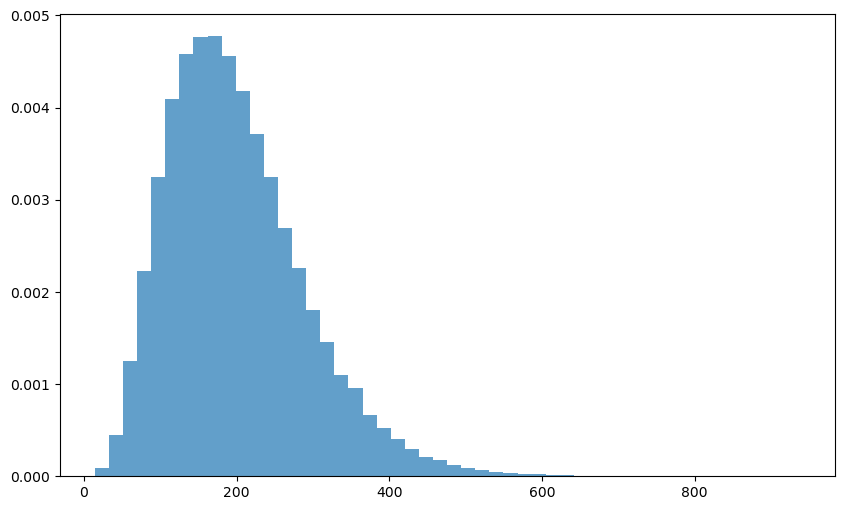

In [5]:
rate = 0.025
k = 5
m = 100000

beta = 1.0 / rate
simulate_wait_times = np.random.exponential(scale=beta, size=(m, k))
total_times = np.sum(simulate_wait_times, axis=1)

sim_mean = np.mean(total_times)

plt.figure(figsize=(10, 6))
plt.hist(total_times, bins=50, density=True, 
         alpha=0.7, label="Simulated Distribution (Histogram)")

The mean time for 5 flies to hit the sandwhich is 200 seconds.

# 3. Orogeny

Converging tectonic plates are pushing a mountain range upwards.
Suppose that each year, a given mountain peak grows by a random amount whose average is 2cm and whose SD is 2cm.

*(a)* If the amount grown each year is independent of every other year,
what's the distribution, approximately, of the amount grown over 100 years (relative to the starting height)?
What about over 10,000 years?

*(b)* Suppose many mountains in this mountain range grow like this (independently).
What proportion of them grow more than 220cm over 100 years?
And, what proportion grow more than 220m over 10,000 years?

*(c)* In fact, the orogeny is accellerating.
Suppose that in fact over the next 100 years, the mean amount grown is in year $y$ is $y/40$cm, with a SD of $y/50$cm.
What is the mean height change after those 100 years? Explain your answer.
Also compute the standard deviation assuming that the amount grown each year is independent.

*(a)*

We can use the CLT to help with this.

If E(X) = 2, then E(S) = 2n.

If SD(X) = 2, then the SD(S) = 2√n

SO in 100 years, the mean will be 200 cm and the SD will be 20 cm.

in 10,000 years, the mean will be 20,000 cm and the SD will be 200 cm.

*(b)*

WE need to find P(S(100) > 220). therefore, Z = [220 - 200] / 20 = 20/20 = 1. We need P(Z > 1.0). This is the area under the curve greater than 1 SD above the mean which is 0.16.

for over 10,000 years, we need the P(S(10000) > 220). Here, z = [22000 - 20000] / 200 = 2000/200 = 10. Now we are looking for P(Z > 10) which is the area under the curve greater than 10 SDs above the mean which is nearly 0.

*(c)*

E(X) = y/40

Var(X) = (y/50)^2 = y^2500

Mean of the sum is also the sum of the means.

E(S) = Sum(y=1 to 100) of Y/40

= 1/40(sum y= 1 to 100)y

= 1/40 (5050) = 505/4 = 126.25 cm

Standard Deviation

Var(S) = sum(y = 1 to 100) (y^2)/2500

= 1/2500 sum(y= 1 to 100) y^2

= 1/2500 (338,350) = 135.34

SD(S) = √135.34 = 11.63 cm